# Stock Market Performance Analysis using Python

Stock Market Performance Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis and 
analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and
the relationships between the stock prices of different companies.


# overview

In [134]:
# importing necessary libraries
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import yfinance as yf
import plotly.graph_objects as go

In [135]:
#Now below is how we can collect real-time stock market data using the yfinance API:
start_date=datetime.now()-pd.DateOffset(months=3)
end_date=datetime.now()

In [136]:
stockss = ['AAPL', 'MSFT', 'NFLX', 'GOOG']

df_list = []

for stock in stockss:
    data = yf.download(stock, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=stockss, names=['stock', 'date'])
print(df.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                        Open        High         Low       Close   Adj Close  \
stock date                                                                     
AAPL  2023-06-05  182.630005  184.949997  178.039993  179.580002  179.337830   
      2023-06-06  179.970001  180.119995  177.429993  179.210007  178.968338   
      2023-06-07  178.440002  181.210007  177.320007  177.820007  177.580200   
      2023-06-08  177.899994  180.839996  177.460007  180.570007  180.326492   
      2023-06-09  181.500000  182.229996  180.630005  180.960007  180.715973   

                     Volume  
stock date                   
AAPL  2023-06-05  121946500  
      2023-06-06   64848400  
      2023-06-07   61944600  
      2023-06

In [137]:
df.reset_index(inplace=True)
df

,stock,date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-06-05,182.630005,184.949997,178.039993,179.580002,179.337830,121946500
1,AAPL,2023-06-06,179.970001,180.119995,177.429993,179.210007,178.968338,64848400
2,AAPL,2023-06-07,178.440002,181.210007,177.320007,177.820007,177.580200,61944600
3,AAPL,2023-06-08,177.899994,180.839996,177.460007,180.570007,180.326492,50214900
4,AAPL,2023-06-09,181.500000,182.229996,180.630005,180.960007,180.715973,48870700
...,...,...,...,...,...,...,...,...
247,GOOG,2023-08-28,132.080002,133.240005,130.850006,131.789993,131.789993,16715500
248,GOOG,2023-08-29,132.998001,137.294998,132.979996,135.490005,135.490005,30803300
249,GOOG,2023-08-30,135.570007,137.250000,135.020996,136.929993,136.929993,21773400
250,GOOG,2023-08-31,137.050003,138.399994,136.820007,137.350006,137.350006,28147900


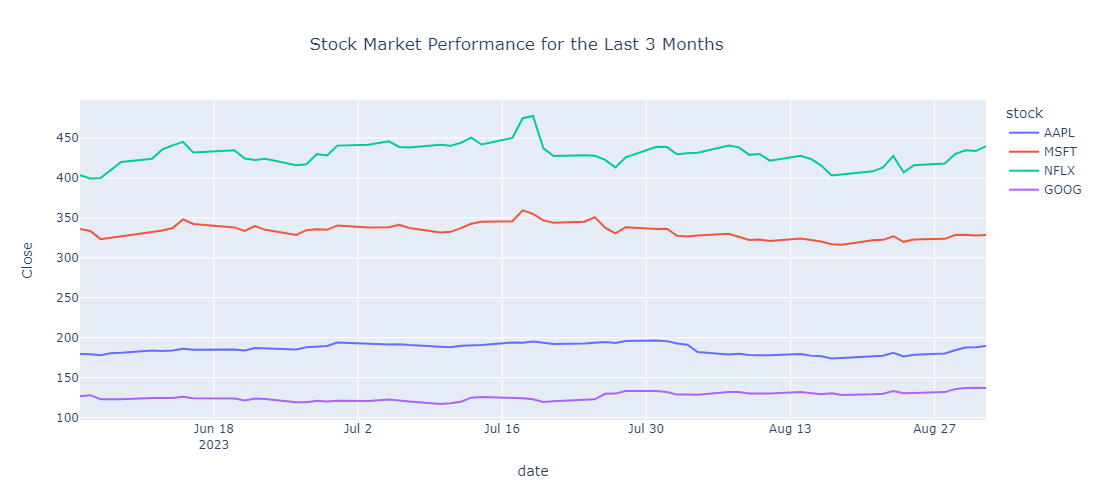

In [138]:
# now we will loook and compare the performance of these shares  for this comparison we will use aline chart
# performance measure via stock closing
fig = px.line(df, x='date', 
              y='Close', 
              color='stock', 
              title="Stock Market Performance for the Last 3 Months")
fig.update_layout(title_x=0.47,height=500,width=800)
fig.show()

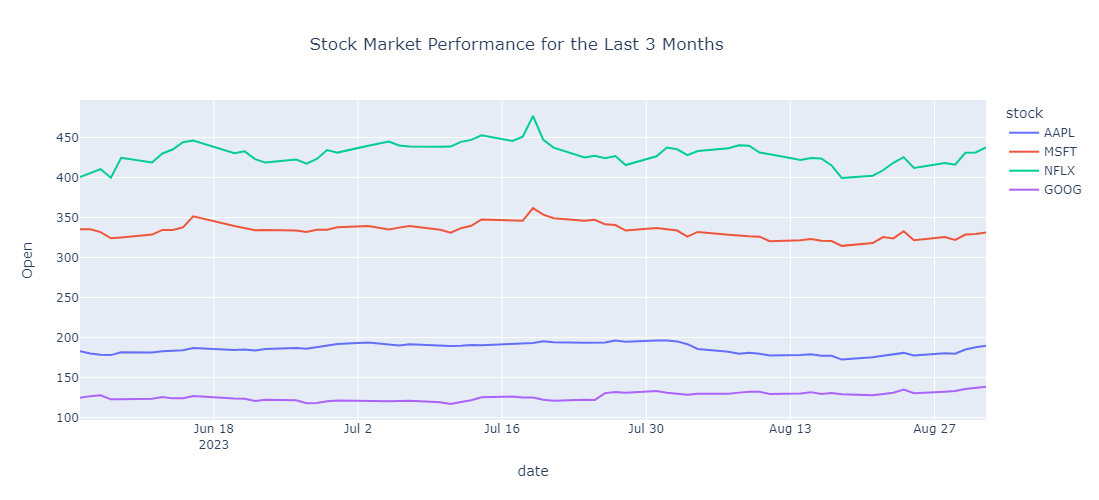

In [139]:
# performance measure via stock opening 
fig = px.line(df, x='date', 
              y='Open', 
              color='stock', 
              title="Stock Market Performance for the Last 3 Months")
fig.update_layout(title_x=0.47,height=500,width=800)
fig.show()

Now let’s look at the faceted area chart, which makes it easy to compare the performance of different companies and 
identify similarities or differences in their stock price movements:

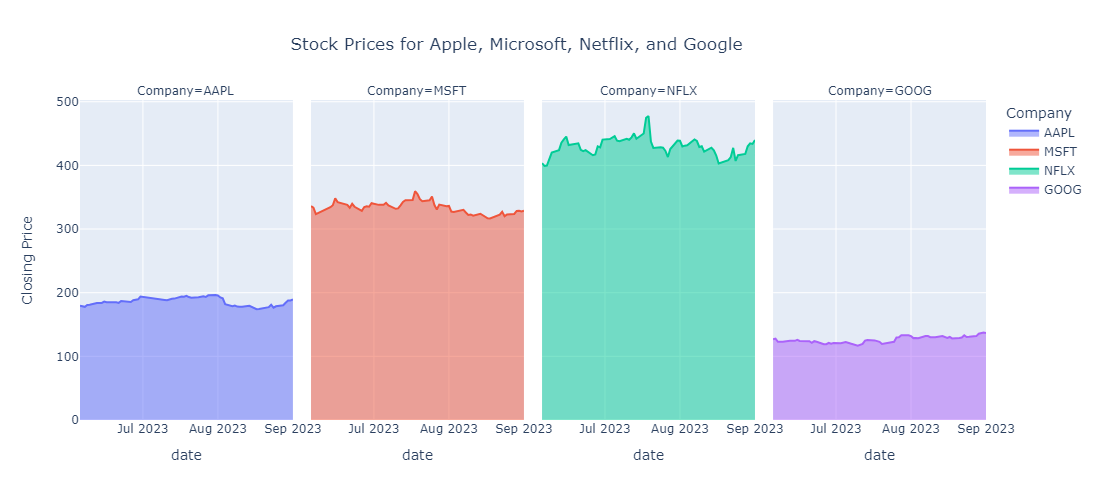

In [140]:
fig = px.area(df, x='date', y='Close', color='stock',
              facet_col='stock',
              labels={'date':'date', 'Close':'Closing Price', 'stock':'Company'},
              title='Stock Prices for Apple, Microsoft, Netflix, and Google')
fig.update_layout(title_x=0.47,height=500)
fig.show()

# Let us now analyze the volatility of all companies. Volatility is a measure of how much and how often the stock price or market fluctuates over a given period of time.
# Here’s how to visualize the volatility of all companies:

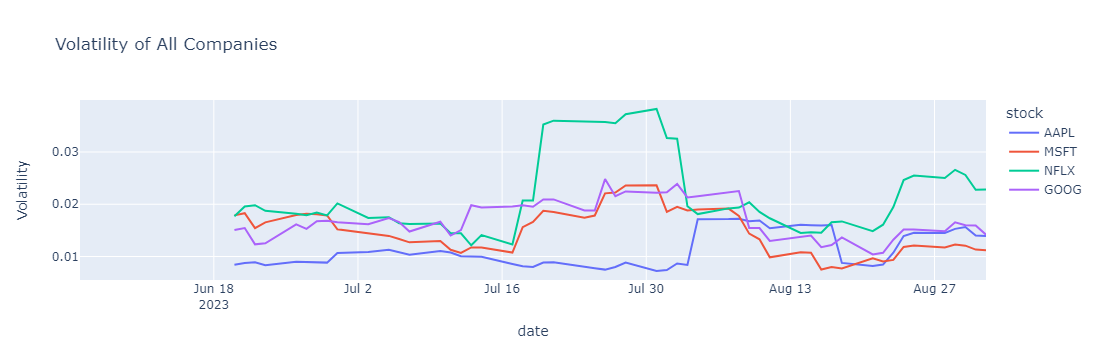

In [141]:
df['Volatility'] = df.groupby('stock')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='date', y='Volatility', 
              color='stock', 
              title='Volatility of All Companies')
fig.show()

#High volatility indicates that the stock or market experiences large and frequent price movements, while low volatility indicates that the market experiences smaller or less frequent price movements.

Now let’s analyze the correlation between the stock prices of Apple and Microsoft:
for that we will look at the datset first


In [142]:
df.head() # as we want to see the data of apple and microsft there fore we will segregate that data from the original data

,stock,date,Open,High,Low,Close,Adj Close,Volume,Volatility
0,AAPL,2023-06-05,182.630005,184.949997,178.039993,179.580002,179.337830,121946500,NaN
1,AAPL,2023-06-06,179.970001,180.119995,177.429993,179.210007,178.968338,64848400,NaN
2,AAPL,2023-06-07,178.440002,181.210007,177.320007,177.820007,177.580200,61944600,NaN
3,AAPL,2023-06-08,177.899994,180.839996,177.460007,180.570007,180.326492,50214900,NaN
4,AAPL,2023-06-09,181.500000,182.229996,180.630005,180.960007,180.715973,48870700,NaN


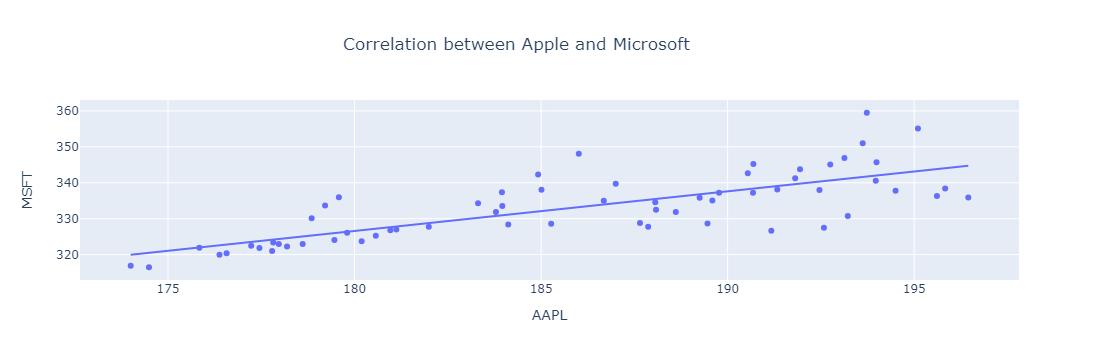

In [143]:
#create a DataFrame with the stock prices of Apple and Microsoft
apple = df.loc[df['stock'] == 'AAPL', ['date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['stock'] == 'MSFT', ['date', 'Close']].rename(columns={'Close': 'MSFT'})
df_corr = pd.merge(apple, microsoft, on='date')

# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='MSFT', trendline="ols",
                 title='Correlation between Apple and Microsoft')
fig.update_layout(title_x=0.47)
fig.show()

In [144]:
apple = df.loc[df['stock'] == 'AAPL', ['date', 'Close']]
apple.rename(columns={'Close':'AAPL'})

,date,AAPL
0,2023-06-05,179.580002
1,2023-06-06,179.210007
2,2023-06-07,177.820007
3,2023-06-08,180.570007
4,2023-06-09,180.960007
...,...,...
58,2023-08-28,180.190002
59,2023-08-29,184.119995
60,2023-08-30,187.649994
61,2023-08-31,187.869995


In [145]:
microsoft = df.loc[df['stock'] == 'MSFT', ['date', 'Close']]
microsoft=microsoft.rename(columns={'Close':'MSFT'})
microsoft

,date,MSFT
63,2023-06-05,335.940002
64,2023-06-06,333.679993
65,2023-06-07,323.380005
66,2023-06-08,325.260010
67,2023-06-09,326.790009
...,...,...
121,2023-08-28,323.700012
122,2023-08-29,328.410004
123,2023-08-30,328.790009
124,2023-08-31,327.760010


In [146]:
df_corr = pd.merge(apple, microsoft, on='date') # conactening both dataframes in one for further analysis

In [147]:
df_corr=df_corr.rename(columns={"Close":"AAPL"}) # renaming column
df_corr.head(2)

,date,AAPL,MSFT
0,2023-06-05,179.580002,335.940002
1,2023-06-06,179.210007,333.679993


In [148]:
import scipy
from scipy import stats

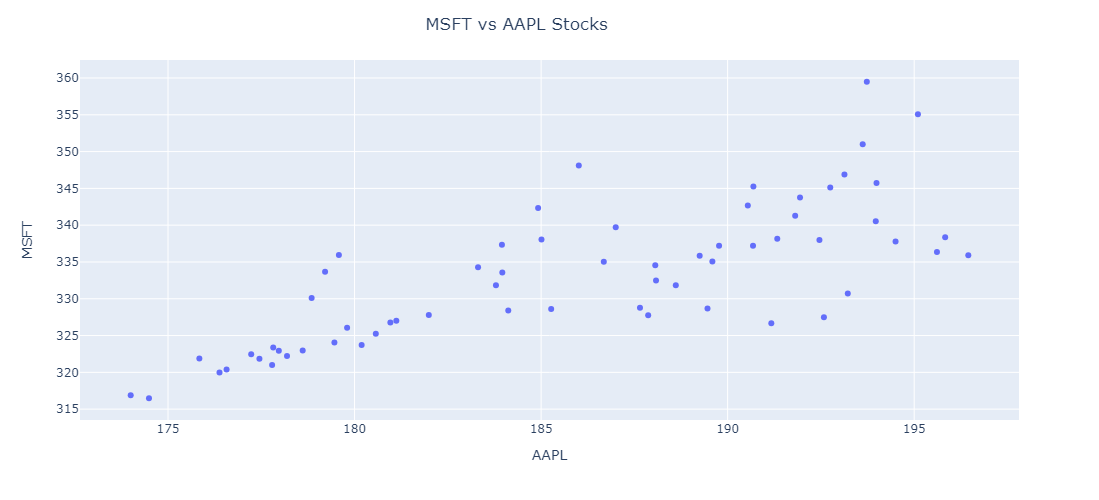

In [149]:
# create a scatter plot to visualize the correlation
# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='MSFT')
fig.update_layout(title="MSFT vs AAPL Stocks",title_x=0.47,height=500,width=700)
fig.show()
# I tried to plot trendline but somehow its not available i mean not working , as we cann see there is a realtion between the shares
#of micrsoft and apple therefore we will try to plot a linear model in it and lets check whether we will be able to apply simple machine learning model 

          

In [150]:
x=df_corr.AAPL
y=df_corr.MSFT
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)

0.7630359748318245


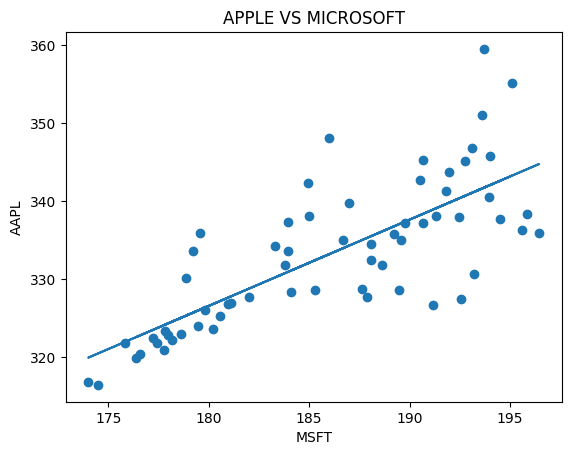

In [151]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("MSFT")
plt.ylabel("AAPL")
plt.title("APPLE VS MICROSOFT")
plt.show()
# used matplotlib library for plotting the trendline as in plotly my its not working even after fixing it a lot

In [152]:
#lets try to predict the THE VALUE WITH THIS MODEL
AAPL=myfunc(180.96)
AAPL
# lets checkout these results via the scatter plot below in plotly

327.6525809496309

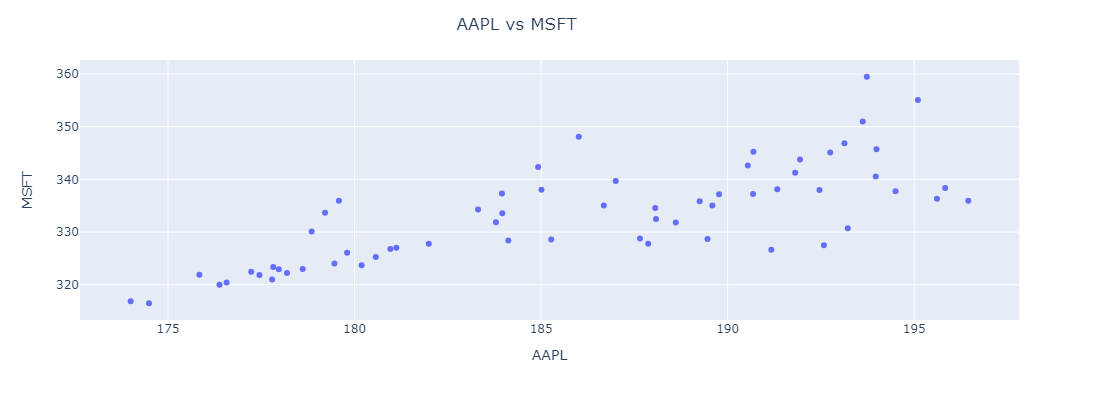

In [153]:
fig = px.scatter(df_corr, x='AAPL', y='MSFT')
fig.update_layout(height=400,width=700,title="AAPL vs MSFT",title_x=0.47)
fig.show()

# now we will plot the correlation between stocks of microsft and netflix too 

In [154]:
netflix = df.loc[df['stock'] == 'NFLX', ['date', 'Close']]
netflix=netflix.rename(columns={'Close':'NFLX'})
netflix

,date,NFLX
126,2023-06-05,403.540009
127,2023-06-06,399.290009
128,2023-06-07,399.769989
129,2023-06-08,409.369995
130,2023-06-09,420.019989
...,...,...
184,2023-08-28,418.059998
185,2023-08-29,429.989990
186,2023-08-30,434.670013
187,2023-08-31,433.679993


In [155]:
corr = pd.merge(microsoft,netflix, on='date')
corr

,date,MSFT,NFLX
0,2023-06-05,335.940002,403.540009
1,2023-06-06,333.679993,399.290009
2,2023-06-07,323.380005,399.769989
3,2023-06-08,325.260010,409.369995
4,2023-06-09,326.790009,420.019989
...,...,...,...
58,2023-08-28,323.700012,418.059998
59,2023-08-29,328.410004,429.989990
60,2023-08-30,328.790009,434.670013
61,2023-08-31,327.760010,433.679993


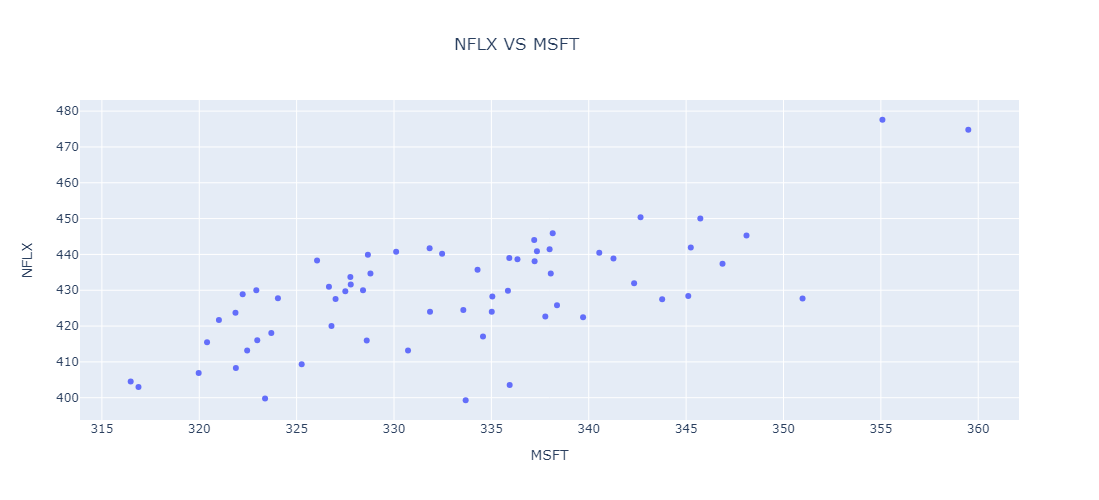

In [156]:
#plotting a scatter plot for below visualization
fig = px.scatter(corr, y='NFLX', x='MSFT',height=500,width=700,title="NFLX VS MSFT")
fig.update_layout(title_x=0.47)
fig.show()

In [157]:
x=corr.NFLX
y=corr.MSFT
slope, intercept, r, p, std_err = stats.linregress(x, y)
r

0.6773783198569849

since there calculated value of coefficient of correlation is >)>^ hence we can say there is a strong linear relationship between these two shares 
too..

# Now let’s analyze moving averages, which provide a useful way to identify trends and patterns in each company’s stock price movements over a period time

In [158]:
df['MA10'] = df.groupby('stock')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('stock')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for stock, group in df.groupby('stock'):
    print(f'Moving Averages for {stock}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
          MA10        MA20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
58  177.188000  180.264501
59  177.855000  179.690001
60  178.962999  179.443501
61  180.349998  179.278500
62  181.846999  179.652000

[63 rows x 2 columns]
Moving Averages for GOOG
           MA10        MA20
189         NaN         NaN
190         NaN         NaN
191         NaN         NaN
192         NaN         NaN
193         NaN         NaN
..          ...         ...
247  130.268001  130.333000
248  130.790001  130.513000
249  131.572000  130.927500
250  132.261000  131.356500
251  133.130000  131.769501

[63 rows x 2 columns]
Moving Averages for MSFT
           MA10        MA20
63          NaN         NaN
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
67          NaN         NaN
..          ...         ...
121  321.361002  323.91

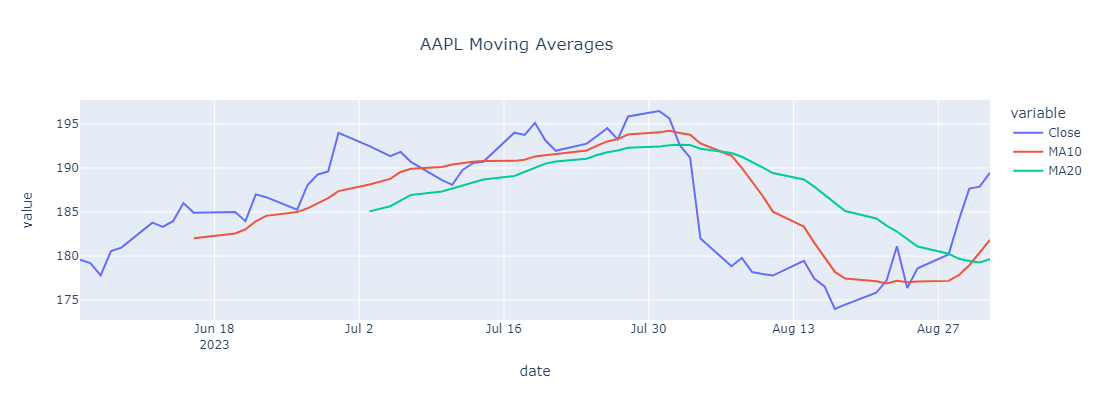

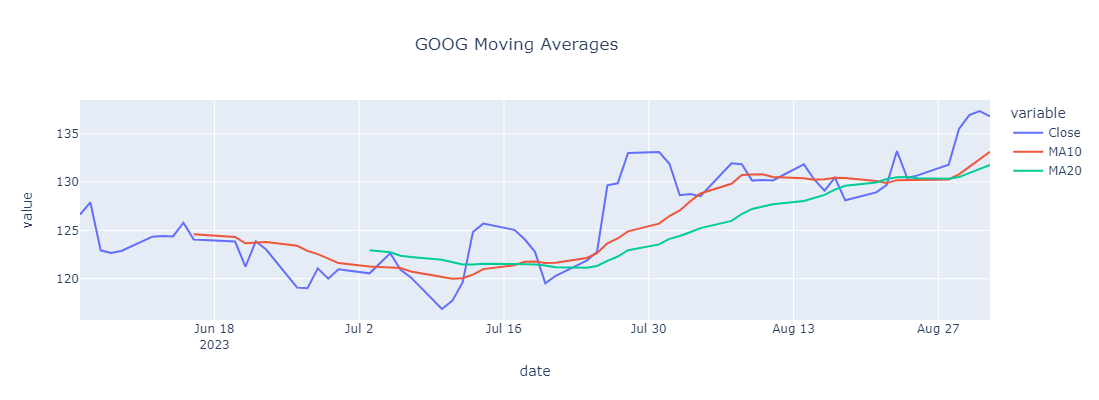

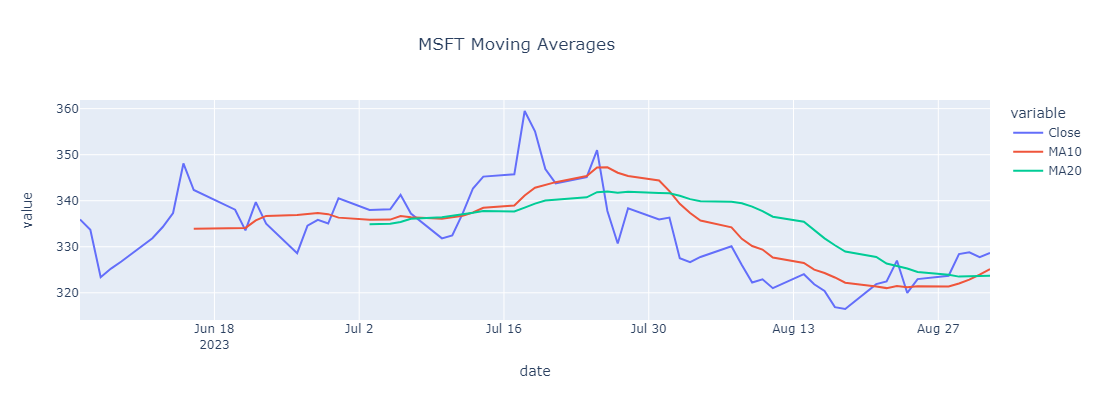

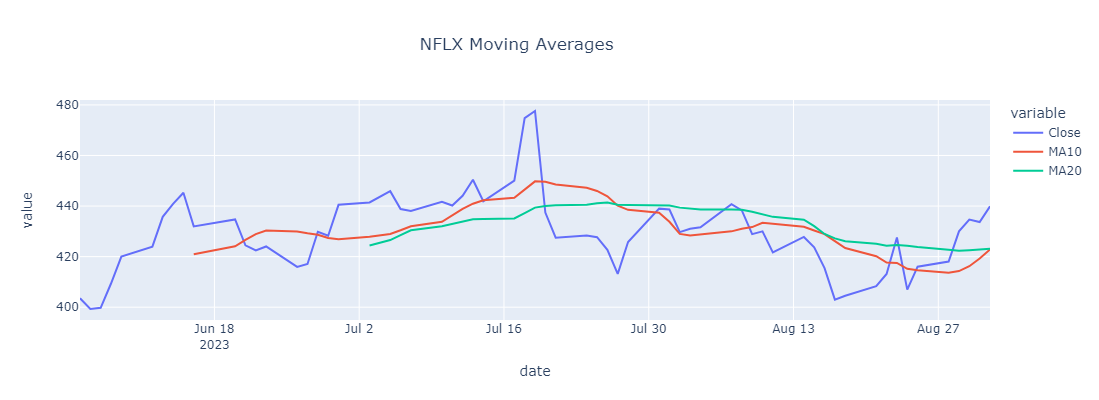

In [159]:
#Now here’s how to visualize the moving averages of all companies:

for stock,group in df.groupby('stock'):

    fig = px.line(group, x='date', y=['Close', 'MA10', 'MA20'], 

                  title=f"{stock} Moving Averages")
    fig.update_layout(title_x=0.47,height=400,width=900)

    fig.show()

The output shows four separate graphs for each company. When the MA10 crosses above the MA20, it is considered a bullish signal indicating that the 
stock price will continue to rise. Conversely, when the MA10 crosses below the MA20, it is a bearish signal that the stock price will continue falling.

# lastly we will see the volume of stock traded via stocks

In [160]:
df.head()

,stock,date,Open,High,Low,Close,Adj Close,Volume,Volatility,MA10,MA20
0,AAPL,2023-06-05,182.630005,184.949997,178.039993,179.580002,179.337830,121946500,NaN,NaN,NaN
1,AAPL,2023-06-06,179.970001,180.119995,177.429993,179.210007,178.968338,64848400,NaN,NaN,NaN
2,AAPL,2023-06-07,178.440002,181.210007,177.320007,177.820007,177.580200,61944600,NaN,NaN,NaN
3,AAPL,2023-06-08,177.899994,180.839996,177.460007,180.570007,180.326492,50214900,NaN,NaN,NaN
4,AAPL,2023-06-09,181.500000,182.229996,180.630005,180.960007,180.715973,48870700,NaN,NaN,NaN


In [161]:
v=df.groupby('stock').Volume.sum()
v

stock
AAPL    3530491800
GOOG    1482610800
MSFT    1656103100
NFLX     414984600
Name: Volume, dtype: int64

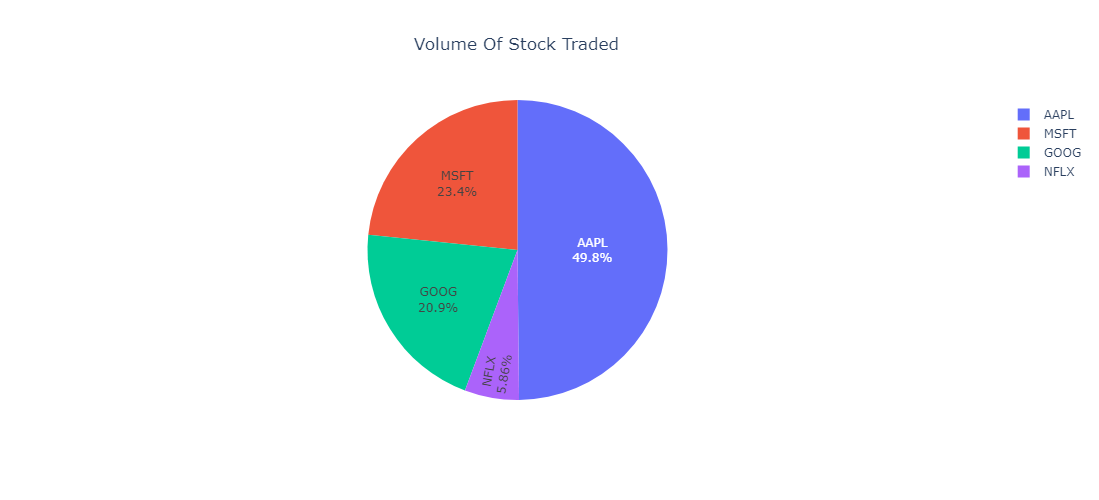

In [162]:
fig=px.pie(v,names=v.index,values=v.values,color_discrete_map={'Thur':'lightcyan',
                                 'Fri':'cyan',
                                 'Sat':'royalblue',
                                 'Sun':'darkblue'})
fig.update_traces(textposition='inside', textinfo='percent+label')# specifying the the text position and info
# adding the title 
fig.update_layout(title="Volume Of Stock Traded",title_x=0.47,)
#increasing the size of chart and adding background
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
)
fig.show()


# Summary
Stock Market Performance Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis,
analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the 
relationships between the stock prices of different companies.
I hope you liked this project on Stock Market Performance Analysis using Python.